<a href="https://colab.research.google.com/github/DeepakChoudhary1/EXTRA/blob/main/Bank_Churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report

pd.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv', header=0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [ ]:
data = pd.get_dummies(data=df, columns=['Geography','Gender'], drop_first=True)

In [ ]:
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [ ]:
data.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [ ]:
X1 = data.drop(['Exited'], axis=1)
X = X1.iloc[:,:]
Y = data.iloc[:, 8]
print(X.shape)
print(Y.shape)

(10000, 11)
(10000,)


In [ ]:
data['CreditScore'].min(), data['CreditScore'].mean(), data['CreditScore'].max()

(350, 650.5288, 850)

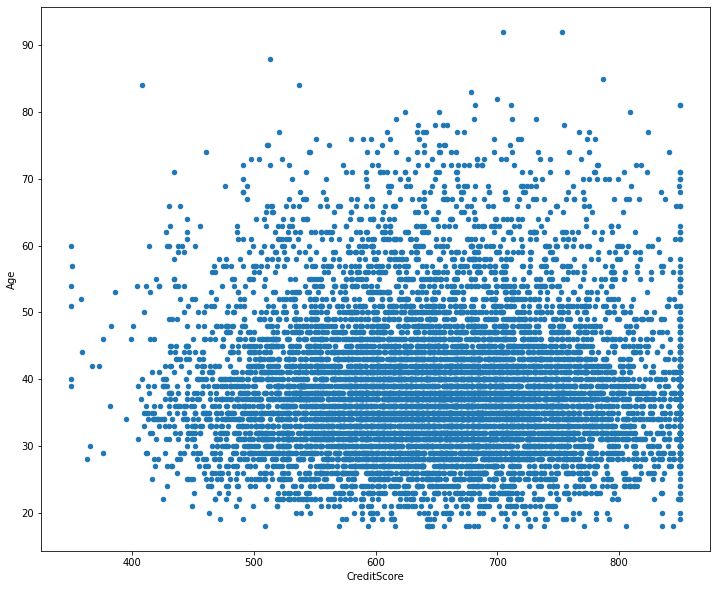

In [ ]:
df.plot(kind="scatter", x='CreditScore',y='Age', figsize=(12,10))

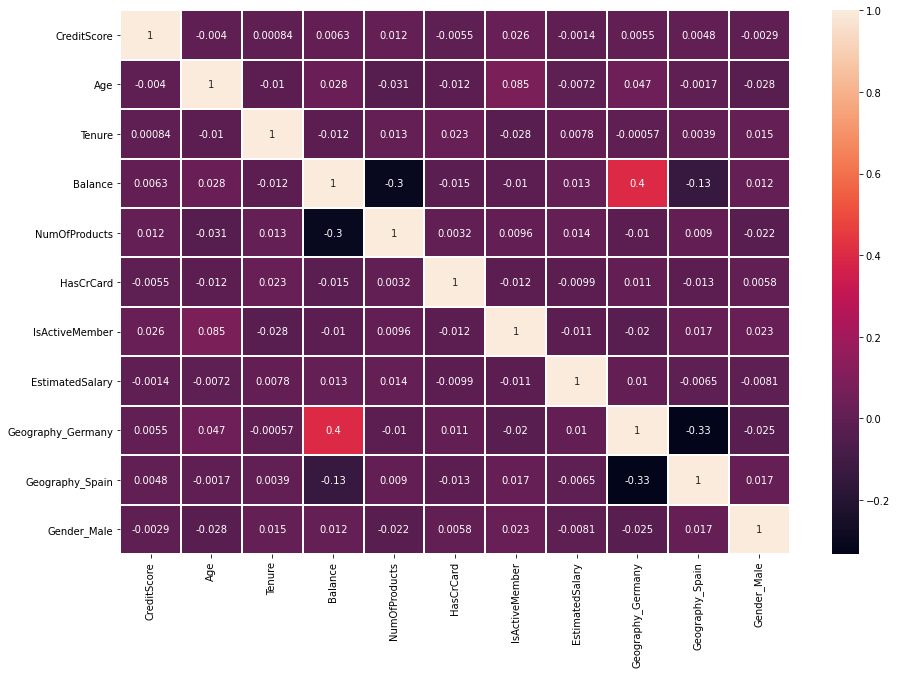

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(X1.corr(), linecolor='white', linewidth=1, annot=True)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=27)

In [ ]:
print(f'X Train shape: {X_train.shape}')
print(f'Y Train shape: {Y_train.shape}')
print(f'X Test shape: {X_test.shape}')
print(f'Y Test shape: {Y_test.shape}')

X Train shape: (7000, 11)
Y Train shape: (7000,)
X Test shape: (3000, 11)
Y Test shape: (3000,)


In [ ]:
m.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train  = pd.DataFrame(m.transform(X_train), columns=X_train.columns)

In [ ]:
X_train[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.964,0.121622,1.0,0.413571,0.000000,1.0,0.0,0.154521,0.0,0.0,0.0
1,0.316,0.418919,0.1,0.393550,0.333333,1.0,1.0,0.662349,0.0,0.0,1.0
2,0.754,0.243243,0.6,0.589036,0.000000,1.0,1.0,0.565165,1.0,0.0,1.0
3,0.590,0.418919,0.5,0.461990,0.666667,0.0,1.0,0.938481,0.0,1.0,0.0
4,0.612,0.675676,0.7,0.644099,0.000000,1.0,1.0,0.932905,1.0,0.0,1.0


In [ ]:
X_test  = pd.DataFrame(m.transform(X_test), columns=X_train.columns)

In [ ]:
X_test[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.694,0.391892,0.6,0.538001,0.000000,1.0,1.0,0.840289,0.0,0.0,0.0
1,0.714,0.351351,0.6,0.000000,0.333333,1.0,1.0,0.962745,0.0,0.0,0.0
2,0.538,0.270270,0.1,0.000000,0.000000,1.0,0.0,0.562209,0.0,1.0,0.0
3,0.698,0.189189,0.1,0.519768,0.666667,1.0,1.0,0.637222,1.0,0.0,1.0
4,0.296,0.162162,0.1,0.000000,0.333333,0.0,0.0,0.678985,0.0,0.0,0.0


In [ ]:
Y_train.value_counts()

0    5565
1    1435
Name: Exited, dtype: int64

## Training on Logistic Regression

In [ ]:
lore = LogisticRegression(random_state=2, n_jobs=-1,class_weight={0: 1435, 1:5565})

In [ ]:
c = np.logspace(-5,4,8)

In [ ]:
param = {'C': c}
grid = GridSearchCV(lore, param_grid=param, cv =5, scoring = 'recall', n_jobs=-1, verbose=0)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=0.1,
                                          class_weight={0: 1435, 1: 5565},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.93069773e-04, 3.72759372e-03, 7.19685673e-02,
       1.38949549e+00, 2.68269580e+01, 5.17947468e+02, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
grid.best_params_

{'C': 0.00019306977288832496}

In [ ]:
grid.best_estimator_

LogisticRegression(C=0.00019306977288832496, class_weight={0: 1435, 1: 5565},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=-1,
                   penalty='l2', random_state=2, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
lore = grid.best_estimator_

In [ ]:
lore.fit(X_train,Y_train)

LogisticRegression(C=0.00019306977288832496, class_weight={0: 1435, 1: 5565},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=-1,
                   penalty='l2', random_state=2, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
lore.score(X_train,Y_train) # Accuracy

0.71

In [ ]:
lore.score(X_test,Y_test)

0.7046666666666667

In [ ]:
y_pred = lore.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
y_pred = pd.Series(y_pred, index = Y_test.index)

In [ ]:
pred_df = pd.DataFrame({"Actual": Y_test, "Predicted": y_pred})
pred_df

,Actual,Predicted
1208,0,1
4426,0,0
4730,1,1
2912,1,0
2618,0,0
...,...,...
8958,0,0
4376,0,0
2354,0,1
9797,0,0


In [ ]:
table = pd.DataFrame(pd.crosstab(pred_df.Actual, pred_df.Predicted))

In [ ]:
table

Predicted,0,1
Actual,,
0,1705,693
1,181,421


In [ ]:
print(classification_report(pred_df.Actual, pred_df.Predicted))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2398
           1       0.38      0.70      0.49       602

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.73      3000



# SGDClassifier

In [ ]:
SGDModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33,class_weight={0: 1435, 1:5565})
SGDModel.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight={0: 1435, 1: 5565},
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_loss',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=33, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('SGD Classifier Model Train Score is : ' , SGDModel.score(X_train, Y_train))
print('SGD Classifier Model Test Score is : ' , SGDModel.score(X_test, Y_test))
print('SGD Classifier Model loss function is : ' , SGDModel.loss_function_)
print('SGD Classifier Model No. of iteratios is : ' , SGDModel.n_iter_)

y_predSDG = SGDModel.predict(X_test)

SGD Classifier Model Train Score is :  0.6538571428571428
SGD Classifier Model Test Score is :  0.6603333333333333
SGD Classifier Model loss function is :  <sklearn.linear_model._sgd_fast.SquaredLoss object at 0x7f459dd931d0>
SGD Classifier Model No. of iteratios is :  321


In [ ]:
y_predSDG = pd.Series(y_predSDG, index = Y_test.index)

In [ ]:
pred_SDG = pd.DataFrame({"Actual": Y_test, "Predicted": y_predSDG})
pred_SDG

,Actual,Predicted
1208,0,0
4426,0,0
4730,1,1
2912,1,0
2618,0,1
...,...,...
8958,0,0
4376,0,0
2354,0,0
9797,0,0


In [ ]:
table2 = pd.DataFrame(pd.crosstab(pred_SDG.Actual, pred_SDG.Predicted))

In [ ]:
table2

Predicted,0,1
Actual,,
0,1790,608
1,411,191


In [ ]:
print(classification_report(pred_SDG.Actual, pred_SDG.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2398
           1       0.24      0.32      0.27       602

    accuracy                           0.66      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.70      0.66      0.68      3000



# SVC Model


In [ ]:
c1 = np.logspace(-5,4,8)
param1 = {'C': c1}

In [ ]:
SVCModel = SVC(kernel= 'rbf',C=0.008122,max_iter=10000,gamma='auto',class_weight={0: 1435, 1:5565})

In [ ]:
SVCModel.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=0.008122, break_ties=False, cache_size=200,
    class_weight={0: 1435, 1: 5565}, coef0=0.0, decision_function_shape='ovr',
    degree=3, gamma='auto', kernel='rbf', max_iter=10000, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print('SVCModel Train Score: ' , SVCModel.score(X_train, Y_train))
print('SVCModel Test Score: ' , SVCModel.score(X_test, Y_test))

SVCModel Train Score:  0.8017142857142857
SVCModel Test Score:  0.7886666666666666


In [ ]:
y_predSVC = SVCModel.predict(X_test)

In [ ]:
y_predSVC = pd.Series(y_predSVC, index = Y_test.index)

In [ ]:
pred_SVC = pd.DataFrame({"Actual": Y_test, "Predicted": y_predSVC})
pred_SVC

,Actual,Predicted
1208,0,0
4426,0,0
4730,1,1
2912,1,1
2618,0,0
...,...,...
8958,0,0
4376,0,0
2354,0,0
9797,0,0


In [ ]:
table3 = pd.DataFrame(pd.crosstab(pred_SVC.Actual, pred_SVC.Predicted))

In [ ]:
table3

Predicted,0,1
Actual,,
0,1938,460
1,174,428


In [ ]:
print(classification_report(pred_SVC.Actual, pred_SVC.Predicted))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2398
           1       0.48      0.71      0.57       602

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.80      3000



# DecisionTreeClassifier Model



In [ ]:
DTModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33,class_weight={0: 1435, 1:5565})
DTModel.fit(X_train, Y_train)

print('Decision Tree Classifier Model Train Score: ' , DTModel.score(X_train, Y_train))
print('Decision Tree Classifier Model Test Score: ' , DTModel.score(X_test, Y_test))
print('Decision Tree Classifier Model Classes: ' , DTModel.classes_)
print('Decision Tree Classifier Model feature importances: ' , DTModel.feature_importances_)


y_predDT = DTModel.predict(X_test)
y_predDT_prob = DTModel.predict_proba(X_test)

Decision Tree Classifier Model Train Score:  0.6897142857142857
Decision Tree Classifier Model Test Score:  0.6836666666666666
Decision Tree Classifier Model Classes:  [0 1]
Decision Tree Classifier Model feature importances:  [0.         0.61284411 0.         0.00322301 0.27426406 0.
 0.10966881 0.         0.         0.         0.        ]


In [ ]:
y_predDT = pd.Series(y_predDT, index = Y_test.index)

In [ ]:
pred_DT = pd.DataFrame({"Actual": Y_test, "Predicted": y_predDT})
pred_DT

,Actual,Predicted
1208,0,1
4426,0,1
4730,1,0
2912,1,1
2618,0,0
...,...,...
8958,0,1
4376,0,0
2354,0,0
9797,0,1


In [ ]:
table4 = pd.DataFrame(pd.crosstab(pred_DT.Actual, pred_DT.Predicted))

In [ ]:
table4

Predicted,0,1
Actual,,
0,1598,800
1,149,453


In [ ]:
print(classification_report(pred_DT.Actual, pred_DT.Predicted))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      2398
           1       0.36      0.75      0.49       602

    accuracy                           0.68      3000
   macro avg       0.64      0.71      0.63      3000
weighted avg       0.80      0.68      0.71      3000



# Gaussian Naive Bayes Model



In [ ]:
GNBModel = GaussianNB()
GNBModel.fit(X_train, Y_train)

print('Gaussian Naive Bayes Model Train Score: ' , GNBModel.score(X_train, Y_train))
print('Gaussian Naive Bayes Model Test Score: ' , GNBModel.score(X_test, Y_test))

GaussianNBModel Train Score is :  0.8251428571428572
GaussianNBModel Test Score is :  0.8243333333333334


In [ ]:
y_predGNB = GNBModel.predict(X_test)
y_predGNB_prob = GNBModel.predict_proba(X_test)

In [ ]:
y_predGNB = pd.Series(y_predGNB, index = Y_test.index)

In [ ]:
pred_GNB = pd.DataFrame({"Actual": Y_test, "Predicted": y_predGNB})
pred_GNB

,Actual,Predicted
1208,0,0
4426,0,0
4730,1,0
2912,1,1
2618,0,0
...,...,...
8958,0,0
4376,0,0
2354,0,0
9797,0,0


In [ ]:
table5 = pd.DataFrame(pd.crosstab(pred_GNB.Actual, pred_GNB.Predicted))

In [ ]:
table5

Predicted,0,1
Actual,,
0,2260,138
1,389,213


In [ ]:
print(classification_report(pred_GNB.Actual, pred_GNB.Predicted))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2398
           1       0.61      0.35      0.45       602

    accuracy                           0.82      3000
   macro avg       0.73      0.65      0.67      3000
weighted avg       0.80      0.82      0.81      3000



# Random Forest Classifier Model



In [ ]:
RFModel = RandomForestClassifier(criterion = 'gini',n_estimators=10,max_depth=7,random_state=33,class_weight={0: 1435, 1:5565}) 
RFModel.fit(X_train, Y_train)


print('Random Forest Classifier Model Train Score: ' , RFModel.score(X_train, Y_train))
print('Random Forest Classifier Model Test Score: ' , RFModel.score(X_test, Y_test))
print('Random Forest Classifier Model features importances: ' , RFModel.feature_importances_)


y_predRF = RFModel.predict(X_test)
y_predRF_prob = RFModel.predict_proba(X_test)

Random Forest Classifier Model Train Score:  0.8324285714285714
Random Forest Classifier Model Test Score:  0.8066666666666666
Random Forest Classifier Model features importances:  [0.02871306 0.4117256  0.01915708 0.08590487 0.26217672 0.00539856
 0.06599492 0.03394729 0.0566874  0.00783475 0.02245977]


In [ ]:
y_predRF = pd.Series(y_predRF, index = Y_test.index)

In [ ]:
pred_RF = pd.DataFrame({"Actual": Y_test, "Predicted": y_predRF})
pred_RF

,Actual,Predicted
1208,0,1
4426,0,0
4730,1,0
2912,1,1
2618,0,0
...,...,...
8958,0,0
4376,0,0
2354,0,0
9797,0,0


In [ ]:
table6 = pd.DataFrame(pd.crosstab(pred_RF.Actual, pred_RF.Predicted))

In [ ]:
table6

Predicted,0,1
Actual,,
0,1999,399
1,181,421


In [ ]:
print(classification_report(pred_RF.Actual, pred_RF.Predicted))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2398
           1       0.51      0.70      0.59       602

    accuracy                           0.81      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.84      0.81      0.82      3000

